In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('merged-data-COMBINED.xlsx')
df.shape

(142305, 18)

In [96]:
df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.960000,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
1,1098000980,2013-03-30,800220505783,2,1.960000,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
2,1102258535,2013-04-12,800220505783,3,2.940015,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
3,1103084867,2013-04-15,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [3]:
df['CategoryBDescription'] = df['CategoryBDescription'].str.lower()
df['CategoryCDescription'] = df['CategoryCDescription'].str.lower()
df['CategoryDDescription'] = df['CategoryDDescription'].str.lower()

In [4]:
def check_nulls(result):    
    features_with_na = [features for features in result.columns if result[features].isnull().sum() > 0]

    for feature in features_with_na: 
        print(feature, np.round(result[feature].isnull().mean(), 4) * 100, '% missing values')
        print(features_with_na)

In [5]:
check_nulls(df)

Age 56.84 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
Gender 56.84 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
MaritalStatus 86.00999999999999 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
HouseholdSize 56.84 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']
Children 62.03999999999999 % missing values
['Age', 'Gender', 'MaritalStatus', 'HouseholdSize', 'Children']


## Idea 1
Check if there is a difference in buying patterns between those who have kids and those who do not.

<AxesSubplot:title={'center':'Number of Children in Customer Data with no nulls'}>

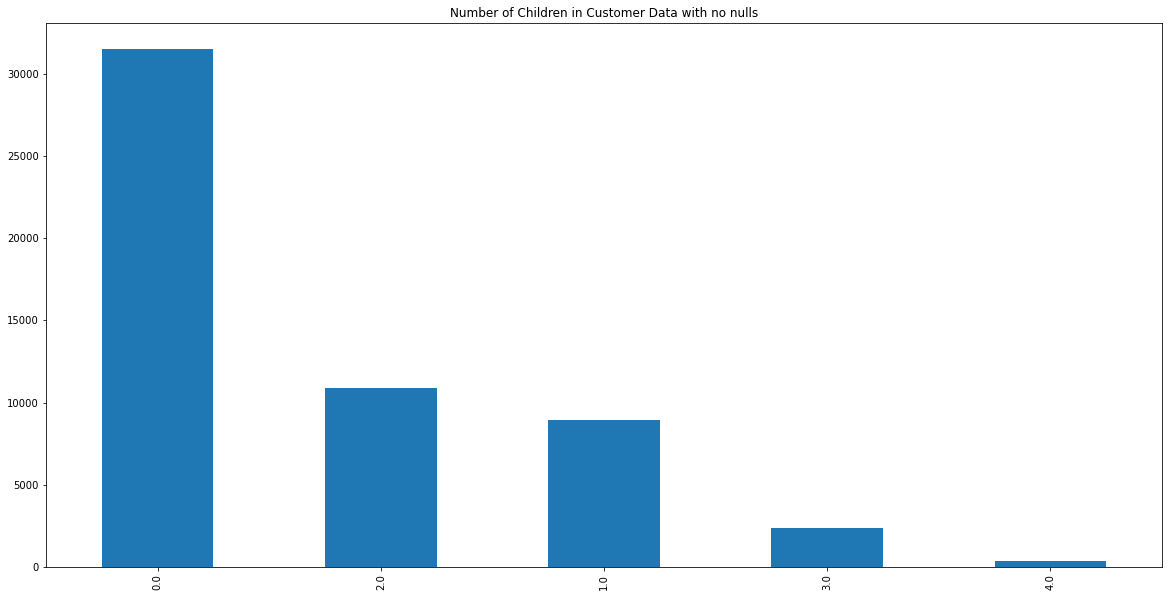

In [6]:
kids_df = df[df.Children.notnull()]
plt.figure(figsize = (20,10))
kids_df['Children'].value_counts().plot(kind = 'bar', title = "Number of Children in Customer Data with no nulls") 

In [7]:
kids_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.960000,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
3,1103084867,2013-04-15,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0
5,1095925310,2013-03-23,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0
6,1099543882,2013-04-04,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [47]:
has_kids_df = kids_df.loc[kids_df['Children'] > 0]
no_kids_df = kids_df.loc[kids_df['Children'] < 1]

print("Shape of dataframe with kids is: " + str(has_kids_df.shape))
print("Shape of dataframe with no kids is: " + str(no_kids_df.shape))

Shape of dataframe with kids is: (22494, 18)
Shape of dataframe with no kids is: (31529, 18)


In [48]:
res = no_kids_df.groupby(['CategoryBDescription', 'Children']).size()
res1 = has_kids_df.groupby(['CategoryBDescription']).size()

<AxesSubplot:xlabel='CategoryBDescription,Children'>

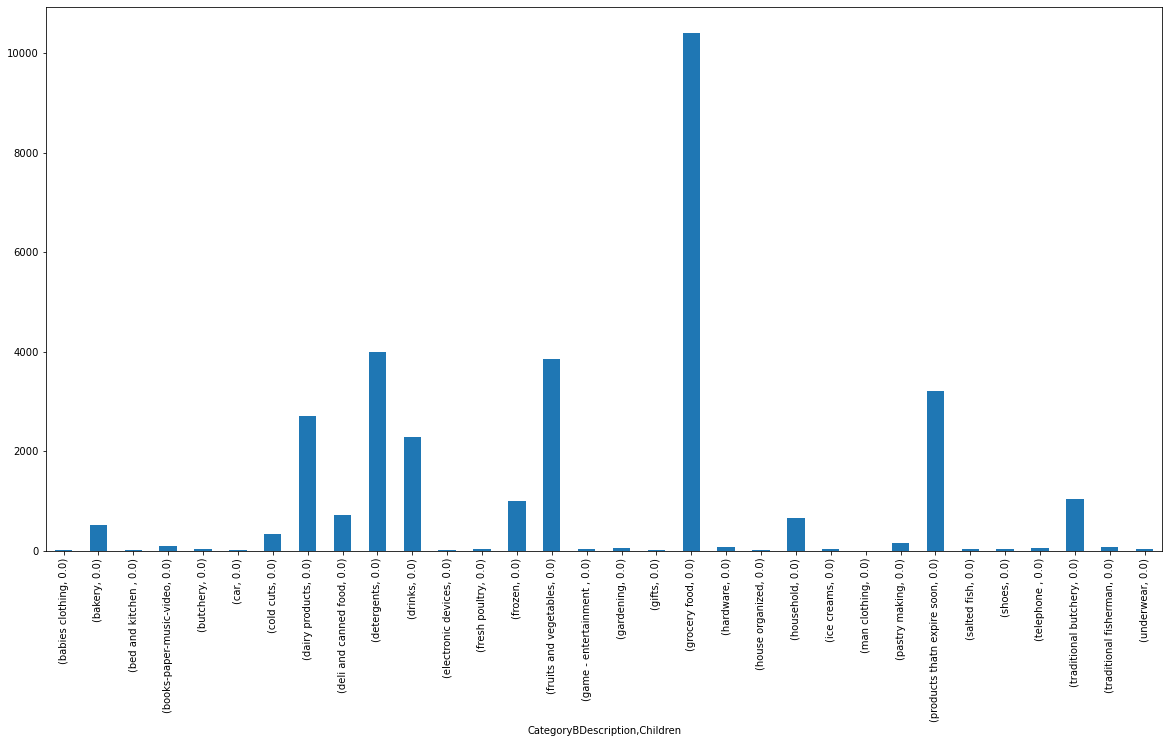

In [49]:
res.plot(kind = 'bar')

### Category B

In [50]:
df2 = pd.DataFrame(res1).reset_index()
df2.rename(columns = {0: "SalesKids"}, inplace = True)

In [51]:
df3 = pd.DataFrame(res).reset_index()
df3.rename(columns = {0: "SalesNoKids"}, inplace = True)
comp = pd.merge(df2, df3, on = "CategoryBDescription")
comp.drop(columns = ['Children'], inplace = True)
comp.head()

,CategoryBDescription,SalesKids,SalesNoKids
0,babies clothing,3,4
1,bakery,387,517
2,bed and kitchen,2,5
3,books-paper-music-video,70,99
4,butchery,25,30


<AxesSubplot:title={'center':'Difference in number of CatB sales between customers with and without kids'}, xlabel='CategoryBDescription'>

<Figure size 1080x720 with 0 Axes>

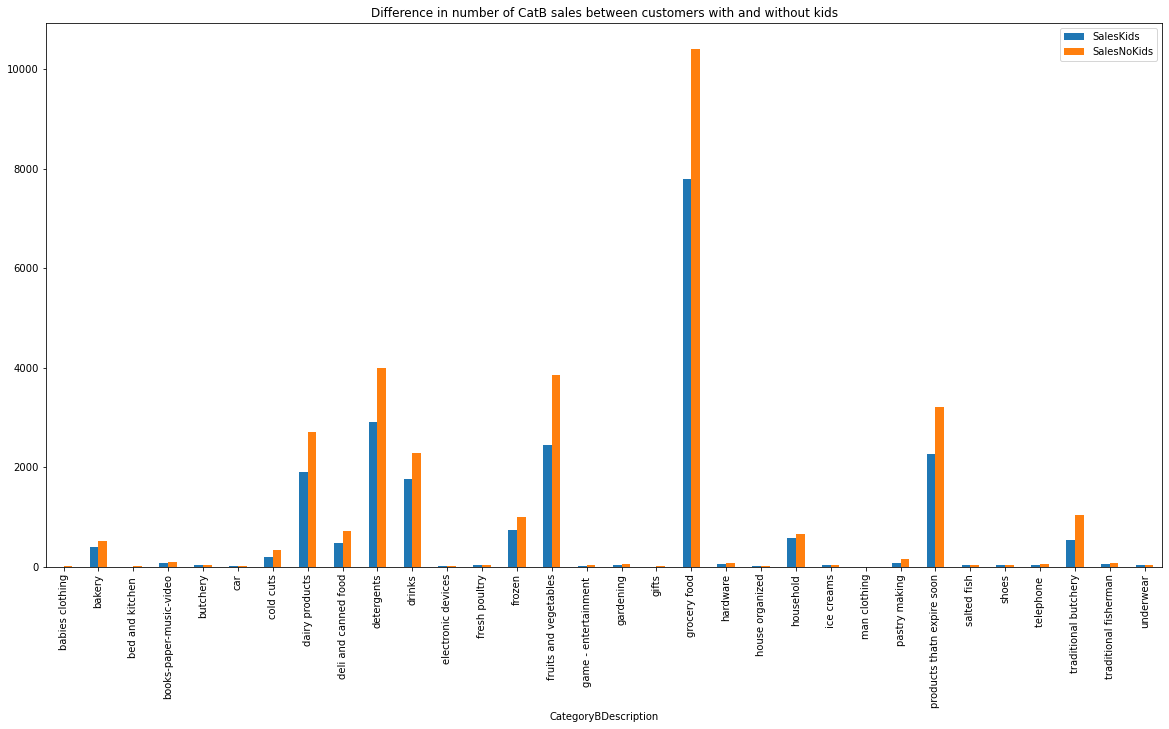

In [52]:
plt.figure(figsize = (15, 10))
plt.rcParams['figure.figsize'] = [20, 10]
comp.plot(x = 'CategoryBDescription', kind = 'bar', stacked = False, title = 'Difference in number of CatB sales between customers with and without kids')

In [53]:
df['CategoryCDescription'].value_counts()

fresh vegetables       10461
fresh milk              9916
beverages               7712
tisues/sanitary etc     5782
fresh fruits            4731
                       ...  
paint                      1
sport                      1
pants                      1
air time otenet            1
health and beauty          1
Name: CategoryCDescription, Length: 186, dtype: int64

### Category C

In [54]:
res11 = no_kids_df.groupby(['CategoryCDescription', 'Children']).size()
res12 = has_kids_df.groupby(['CategoryCDescription']).size()

In [55]:
df4 = pd.DataFrame(res11).reset_index()
df4.rename(columns = {0: "SalesKids"}, inplace = True)
df5 = pd.DataFrame(res12).reset_index()
df5.rename(columns = {0: "SalesNoKids"}, inplace = True)
comp1 = pd.merge(df4, df5, on = "CategoryCDescription")
comp1.drop(columns = ['Children'], inplace = True)
comp1.head()

,CategoryCDescription,SalesKids,SalesNoKids
0,pet,73,36
1,air time cosmote,30,19
2,air time q,1,1
3,air time vodafone,18,12
4,air time wind,4,6


In [60]:
comp1 = comp1.sort_values(['SalesKids', 'SalesNoKids'], ascending = [False, False])
comp1_plot = comp1.head(35)

<AxesSubplot:title={'center':'Difference in number of CatC sales between customers with and without kids'}, xlabel='CategoryCDescription'>

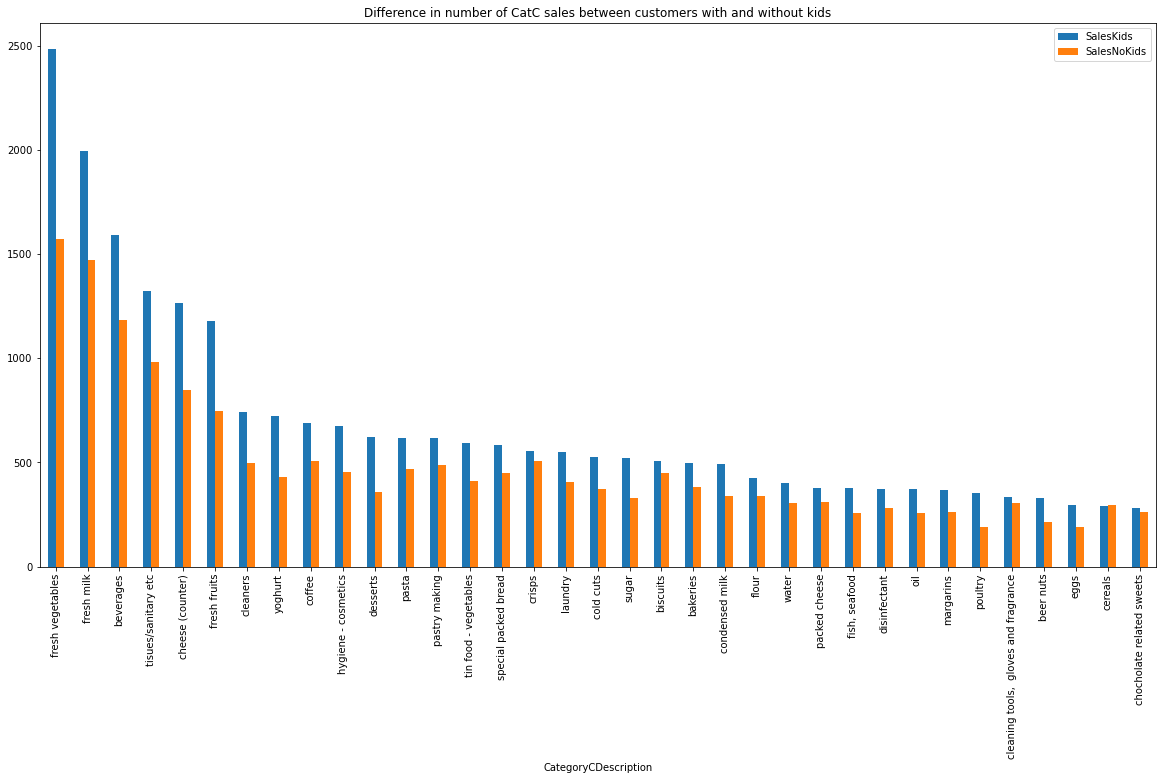

In [62]:
plt.rcParams['figure.figsize'] = [20, 10]
comp1_plot.plot(x = 'CategoryCDescription', kind = 'bar', stacked = False, title = 'Difference in number of CatC sales between customers with and without kids')

In [68]:
lst1 = []
nkids_vals = list(comp1['SalesNoKids'])
kids_vals = list(comp1['SalesKids'])
for i in range(len(nkids_vals)):
    x = kids_vals[i] - nkids_vals[i]
    lst1.append(x)

In [69]:
comp1['Difference'] = lst1

In [72]:
comp1 = comp1.sort_values(['Difference'], ascending = [False])

In [74]:
comp1 = comp1.head(30)
comp1.drop(columns = ['Difference'], inplace = True)

<AxesSubplot:title={'center':'Biggest Difference in number of CatC sales between customers with and without kids'}, xlabel='CategoryCDescription'>

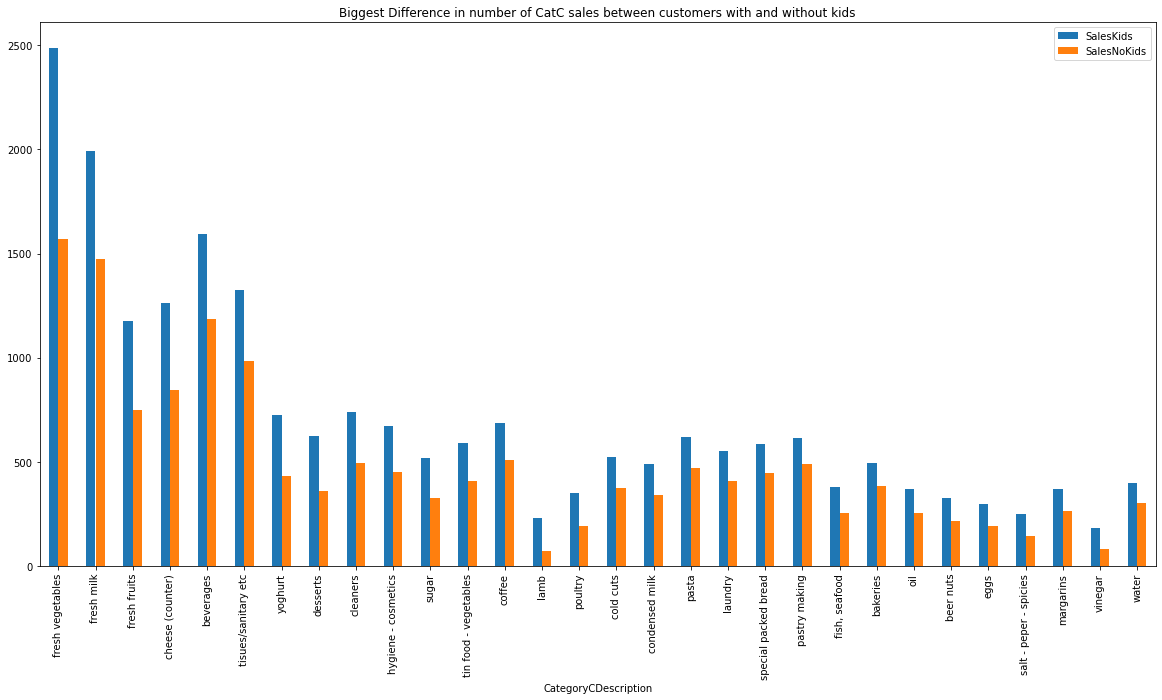

In [81]:
plt.rcParams['figure.figsize'] = [20, 10]
comp1.plot(x = 'CategoryCDescription', kind = 'bar', stacked = False, title = 'Biggest Difference in number of CatC sales between customers with and without kids')

### CategoryD

In [84]:
res21 = no_kids_df.groupby(['CategoryDDescription', 'Children']).size()
res22 = has_kids_df.groupby(['CategoryDDescription']).size()

df6 = pd.DataFrame(res21).reset_index()
df6.rename(columns = {0: "SalesKids"}, inplace = True)
df7 = pd.DataFrame(res22).reset_index()
df7.rename(columns = {0: "SalesNoKids"}, inplace = True)
comp2 = pd.merge(df6, df7, on = "CategoryDDescription")
comp2.drop(columns = ['Children'], inplace = True)
comp2.head()

,CategoryDDescription,SalesKids,SalesNoKids
0,adhesives,5,3
1,"adhesives, tapes, labels",2,1
2,adult,107,81
3,air fresheners,25,14
4,air time cosmote,30,19


In [85]:
comp2 = comp2.sort_values(['SalesKids', 'SalesNoKids'], ascending = [False, False])
comp2_plot = comp2.head(35)

<AxesSubplot:title={'center':'Difference in number of CatD sales between customers with and without kids'}, xlabel='CategoryDDescription'>

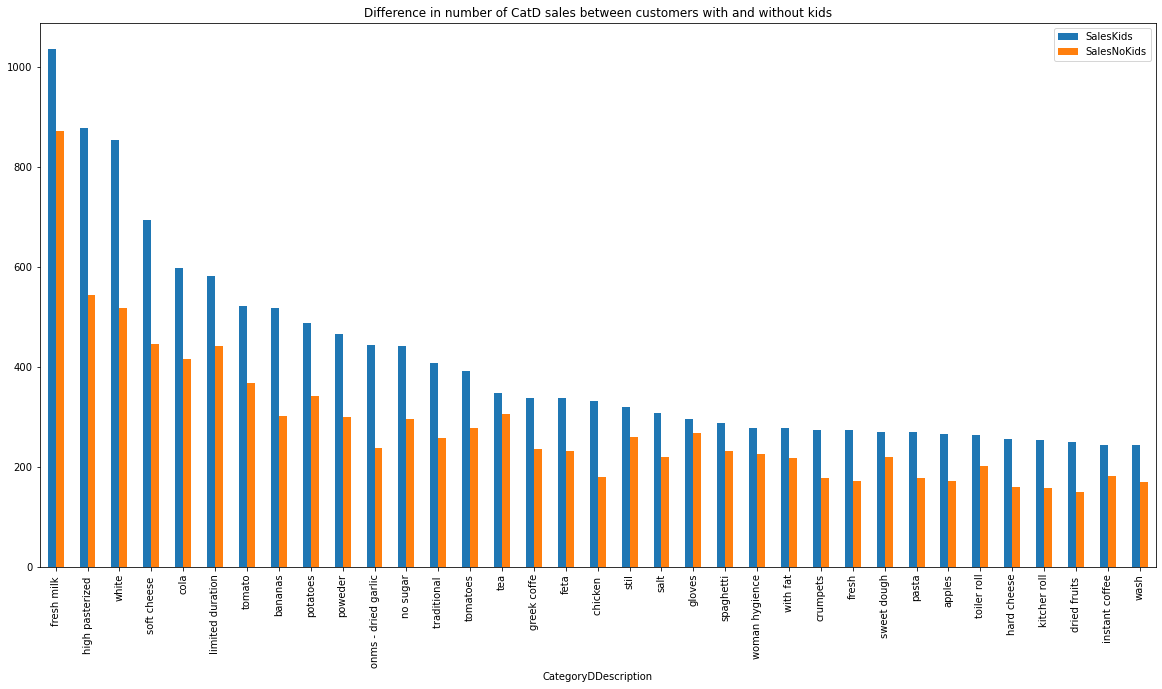

In [86]:
plt.rcParams['figure.figsize'] = [20, 10]
comp2_plot.plot(x = 'CategoryDDescription', kind = 'bar', stacked = False, title = 'Difference in number of CatD sales between customers with and without kids')

In [93]:
### Biggest Diffs
lst2 = []
nkids_vals = list(comp2['SalesNoKids'])
kids_vals = list(comp2['SalesKids'])
for i in range(len(nkids_vals)):
    x = kids_vals[i] - nkids_vals[i]
    lst2.append(x)

In [94]:
comp2['Difference'] = lst2
comp2 = comp2.sort_values(['Difference'], ascending = [False])

comp2 = comp2.head(35)
comp2

,CategoryDDescription,SalesKids,SalesNoKids,Difference
420,white,854,518,336
185,high pasterized,877,543,334
345,soft cheese,693,445,248
21,bananas,517,301,216
259,onms - dried garlic,443,237,206
89,cola,597,416,181
295,poweder,465,299,166
154,fresh milk,1035,871,164
390,tomato,521,368,153
69,chicken,331,179,152


<AxesSubplot:title={'center':'Biggest Difference in number of CatD sales between customers with and without kids'}, xlabel='CategoryDDescription'>

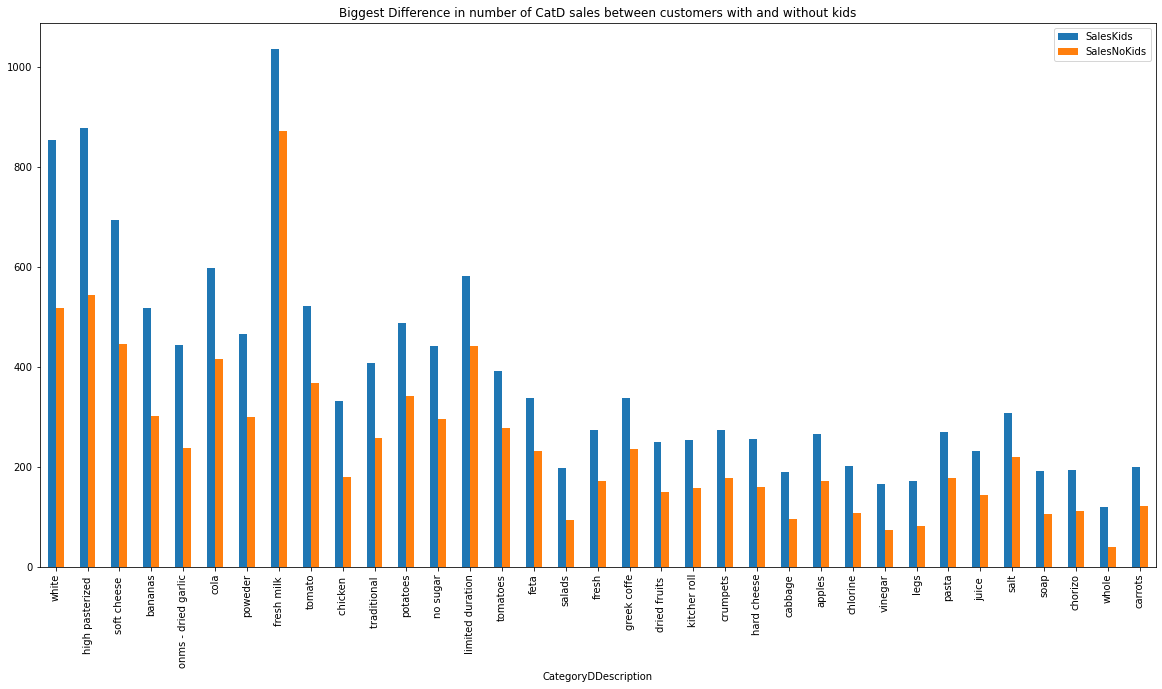

In [95]:
comp2.drop(columns = ['Difference'], inplace = True)

plt.rcParams['figure.figsize'] = [20, 10]
comp2.plot(x = 'CategoryDDescription', kind = 'bar', stacked = False, title = 'Biggest Difference in number of CatD sales between customers with and without kids')

### Time-Series Plot

In [98]:
df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,CategoryA,CategoryB,CategoryC,CategoryD,CategoryBDescription,CategoryCDescription,CategoryDDescription,Card_ID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,1103084867,2013-04-15,800220505783,2,1.960000,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
1,1098000980,2013-03-30,800220505783,2,1.960000,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
2,1102258535,2013-04-12,800220505783,3,2.940015,10,14,239,2,grocery food,pet,cat,9160001242098,73.0,Male,NaN,3.0,NaN
3,1103084867,2013-04-15,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9160003751260,54.0,Female,NaN,2.0,0.0
4,1097579428,2013-03-29,520423907421,2,0.580015,10,14,239,2,grocery food,pet,cat,9164001986624,52.0,Unknown,Married,3.0,2.0


In [101]:
#### Lets do a monthly breakdown
df_copy = df.copy()
df_copy['Date'] = df_copy['Date'].astype(str)
dates = list(df_copy['Date'])
yr = []
mth = []
for i in range(len(dates)):
    l = dates[i].split("-")
    yr.append(l[0])
    mth.append(l[1])

In [105]:
#yr
df_copy['Year'] = yr
df_copy['Month'] = mth

In [106]:
df_copy['Year'] = df_copy['Year'].astype(int)
df_copy['Year'].max()

2013

In [107]:
df_copy['Month'].value_counts()

04    73524
03    62385
05     6396
Name: Month, dtype: int64

In [141]:
res_dailysales = df.groupby(['CategoryBDescription', 'Date'])['Sum_Value'].sum()
res_dailysales

CategoryBDescription  Date      
babies clothing       2013-03-06     2.989993
                      2013-03-07    11.189992
                      2013-03-09     2.989993
                      2013-03-19     8.210007
                      2013-03-30     3.000000
                                      ...    
underwear             2013-04-27    12.200000
                      2013-04-29    33.200030
                      2013-04-30    18.700015
                      2013-05-01    35.000030
                      2013-05-02    28.100044
Name: Sum_Value, Length: 1295, dtype: float64

In [155]:
dffff = pd.DataFrame(res_dailysales)
dffff = dffff.reset_index()

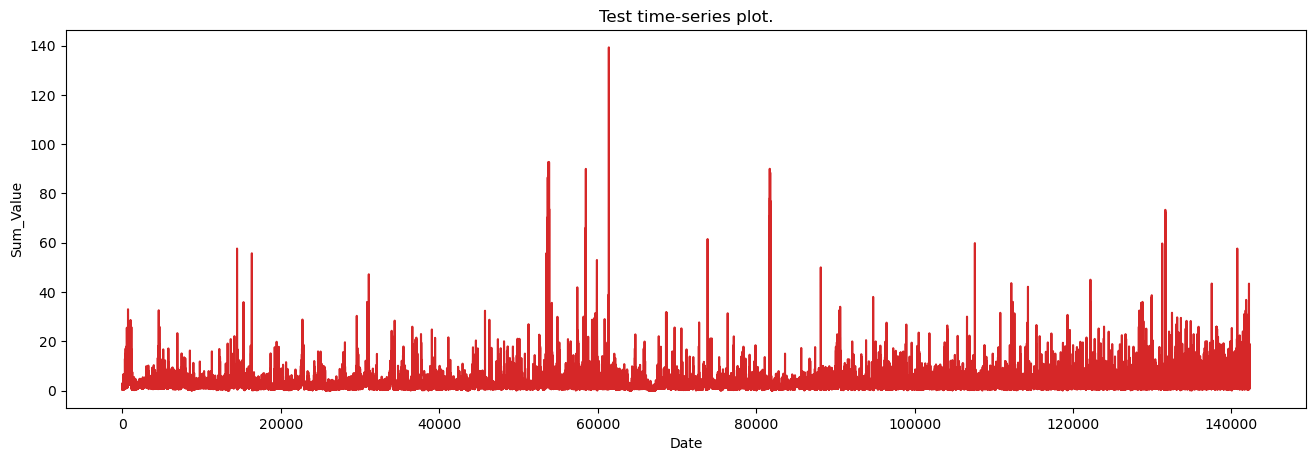

In [173]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Sum_Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x = df.index, y = df.Sum_Value, title = 'Test time-series plot.') 

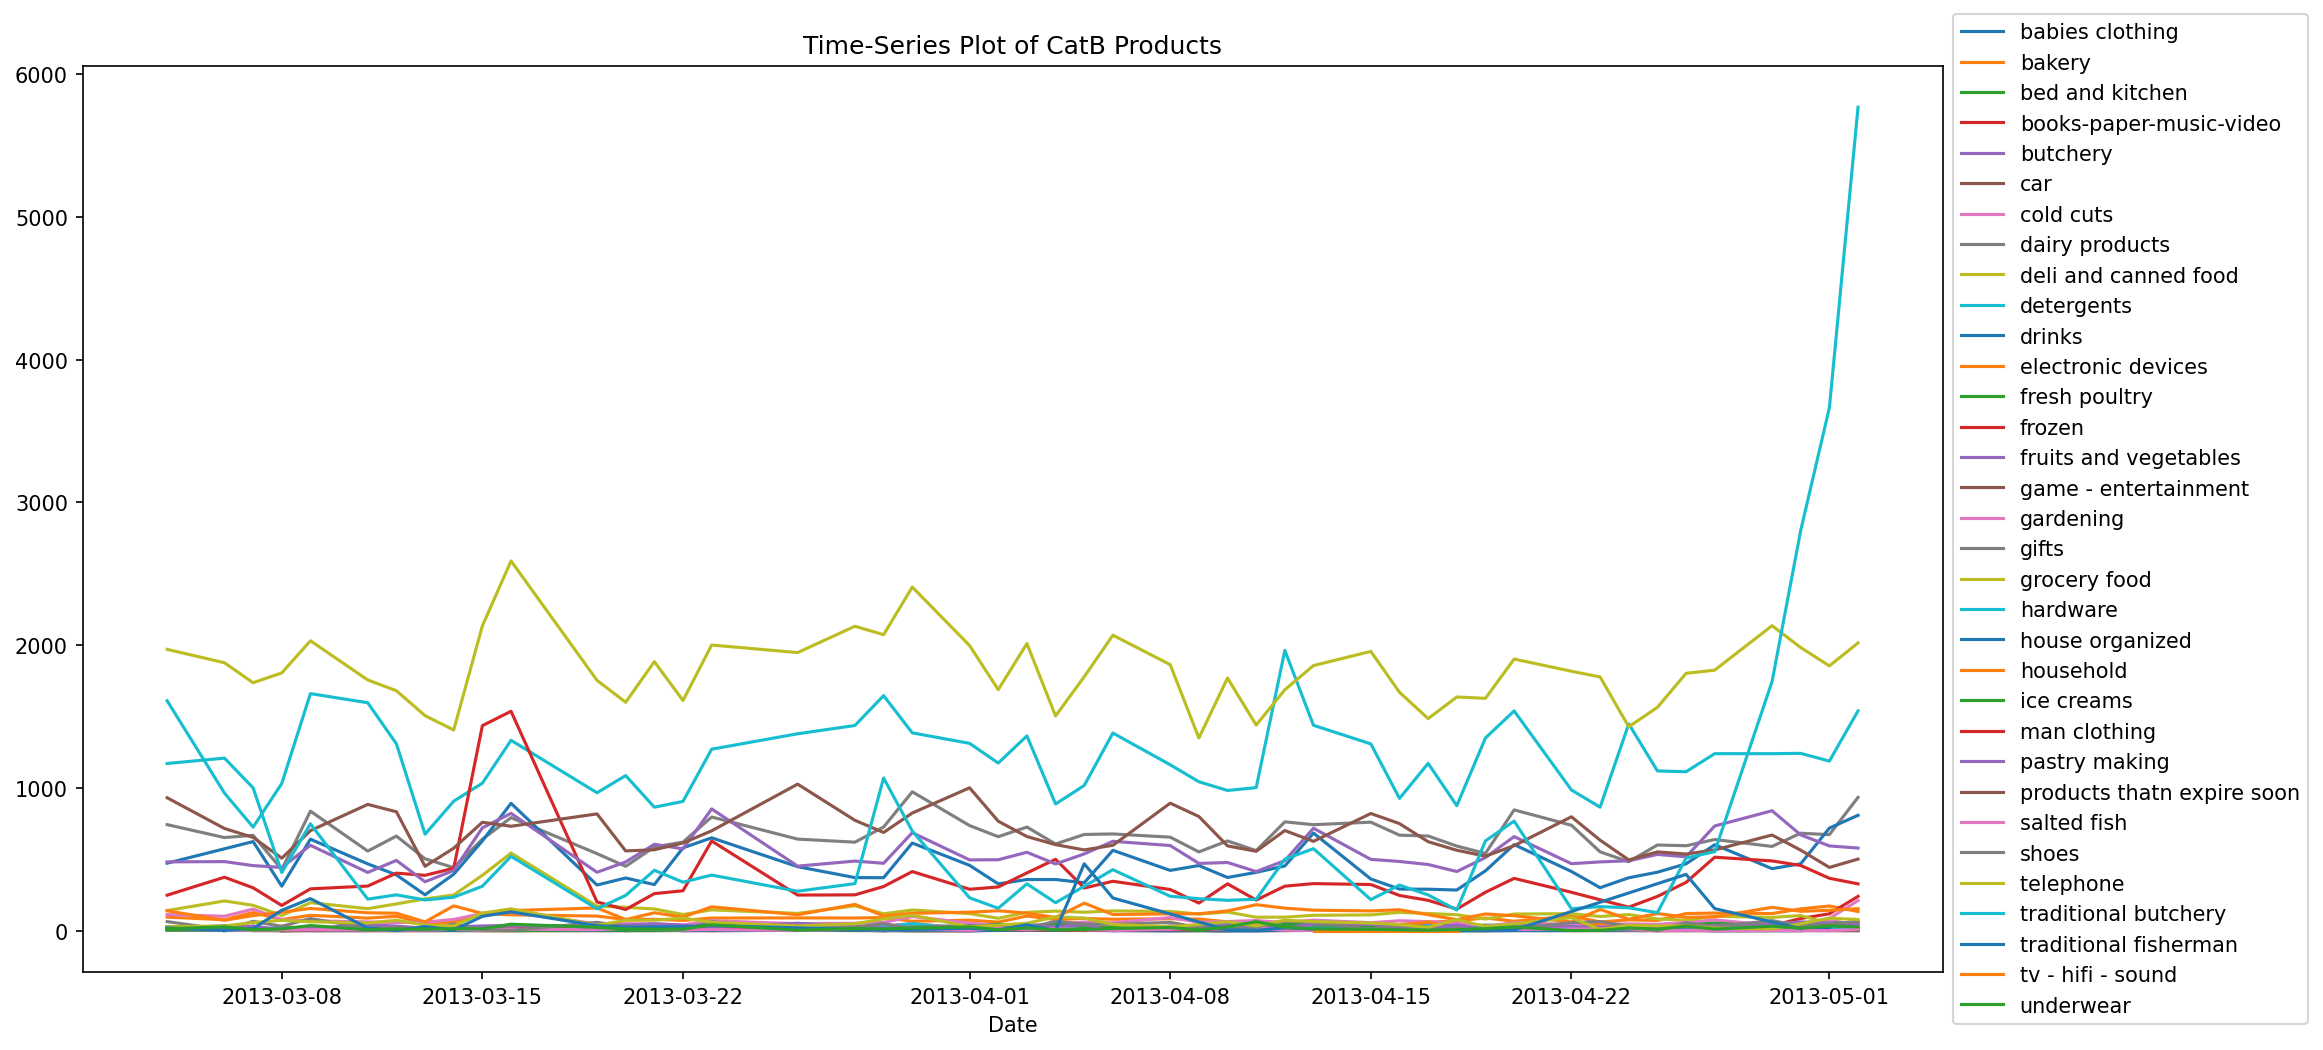

In [172]:
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
grpss = list(dffff['CategoryBDescription'].unique())
for i in range(len(grpss)):
    df_temp = dffff.loc[dffff['CategoryBDescription'] == grpss[i]]
    plt.plot(df_temp['Date'], df_temp['Sum_Value'], label = str(grpss[i]))

#adding title to the plot
plt.title('Time-Series Plot of CatB Products')
  
# adding Label to the x-axis
plt.xlabel('Date')
# adding legend to the curve
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))